In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from google.colab import drive, files
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


Mounted at /content/drive


In [3]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tennis Project/features_processed.csv')
features.columns

Index(['surface', 'A_rank', 'B_rank', 'A_elo_surface', 'B_elo_surface',
       'A_elo', 'B_elo', 'A_avged_elo', 'B_avged_elo', 'A_wins', 'B_wins',
       'A_wins_surface', 'B_wins_surface', 'A_12month_form', 'B_12month_form',
       'A_12month_form_surface', 'B_12month_form_surface', 'A_hand', 'B_hand'],
      dtype='object')

In [4]:
# Randomly assign winner and loser to player A and B, whilst maintaining attributes

features['A_won'] = 0
np.random.seed(seed=42)

for i in range(len(features)):
    playerA_won = np.random.randint(0, 2)
    features.loc[i, 'A_won'] = playerA_won
    if playerA_won == 0:
        features.loc[i, 'A_rank'], features.loc[i, 'B_rank'] = features.loc[i, 'B_rank'], features.loc[i, 'A_rank']
        features.loc[i, 'A_elo'], features.loc[i, 'B_elo'] = features.loc[i, 'B_elo'], features.loc[i, 'A_elo']
        features.loc[i, 'A_elo_surface'], features.loc[i, 'B_elo_surface'] = features.loc[i, 'B_elo_surface'], features.loc[i, 'A_elo_surface']
        features.loc[i, 'A_wins'], features.loc[i, 'B_wins'] = features.loc[i, 'B_wins'], features.loc[i, 'A_wins']
        features.loc[i, 'A_wins_surface'], features.loc[i, 'B_wins_surface'] = features.loc[i, 'B_wins_surface'], features.loc[i, 'A_wins_surface']
        features.loc[i, 'A_12month_form'], features.loc[i, 'B_12month_form'] = features.loc[i, 'B_12month_form'], features.loc[i, 'A_12month_form']
        features.loc[i, 'A_12month_form_surface'], features.loc[i, 'B_12month_form_surface'] =  features.loc[i, 'B_12month_form_surface'], features.loc[i, 'A_12month_form_surface']
        features.loc[i, 'A_hand'], features.loc[i, 'B_hand'] = features.loc[i, 'B_hand'], features.loc[i, 'A_hand']

In [5]:
features = pd.get_dummies(features)

In [6]:
features = features.dropna().reset_index(drop=True)
features

,A_rank,B_rank,A_elo_surface,B_elo_surface,A_elo,B_elo,A_avged_elo,B_avged_elo,A_wins,B_wins,A_wins_surface,B_wins_surface,A_12month_form,B_12month_form,A_12month_form_surface,B_12month_form_surface,A_hand,B_hand,A_won,surface_carpet,surface_clay,surface_grass,surface_hard
0,23.0,3.0,1644.770,1988.523,1772.521,2151.654,2070.0885,1708.6455,0,0,0,0,0.000000,0.833333,0.000000,0.833333,0.0,0.0,0,False,False,True,False
1,22.0,30.0,1584.360,1501.014,1859.956,1714.681,1722.1580,1607.8475,0,0,0,0,0.666667,0.000000,0.666667,0.000000,1.0,0.0,1,False,False,True,False
2,58.0,55.0,1792.652,1554.535,1821.925,1712.486,1633.5105,1807.2885,0,0,0,0,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0,False,False,True,False
3,39.0,15.0,1542.475,1740.677,1794.640,1885.650,1813.1635,1668.5575,0,0,0,0,0.000000,0.750000,0.000000,0.750000,0.0,0.0,0,False,False,True,False
4,97.0,18.0,1503.159,1766.935,1607.397,1922.537,1844.7360,1555.2780,0,0,0,0,0.000000,0.666667,0.000000,0.666667,0.0,1.0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143489,56.0,7.0,1590.551,1901.149,1684.596,1926.081,1913.6150,1637.5735,0,0,0,0,0.515152,0.717949,0.533333,0.783784,0.0,0.0,0,False,True,False,False
143490,47.0,29.0,1672.773,1694.263,1698.955,1724.848,1709.5555,1685.8640,0,0,0,0,0.680000,0.525424,0.708333,0.617647,0.0,0.0,0,False,True,False,False
143491,117.0,19.0,1542.649,1554.270,1567.658,1797.649,1555.1535,1675.9595,0,1,0,0,0.700000,0.603448,0.833333,0.500000,0.0,0.0,1,False,True,False,False
143492,7.0,44.0,1905.735,1605.691,1932.462,1796.400,1919.0985,1701.0455,1,0,0,0,0.717949,0.636364,0.783784,0.666667,0.0,0.0,1,False,True,False,False


In [7]:
X = features.drop('A_won', axis=1)
y = features['A_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7763685145823896


In [9]:
def model_accuracy(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

model = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

In [ ]:
model_accuracy(model)

0.7727098505174397

In [ ]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.773108584868679

In [ ]:
model.coef_

array([[ 6.15968880e-02, -5.80097250e-02,  5.40997917e-01,
        -5.30841466e-01, -2.20639864e-01,  2.42943303e-01,
         7.45879767e-03,  1.03202710e-02, -8.76670757e-02,
         6.60231158e-02,  8.85415739e-03,  7.26587660e-03,
        -1.55220664e-01,  1.34256444e-01, -1.61261804e+00,
         1.59611913e+00, -1.20230306e-02,  5.81273225e-03,
        -4.88505872e-03,  4.88505872e-03,  8.85770306e-03,
        -8.85770306e-03, -7.82631743e-03,  7.82631743e-03,
        -6.12021786e-04,  6.12021786e-04]])

In [ ]:
# Predicting outcome based only on ranking
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_rank'] > features.loc[i, 'B_rank'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_rank'] < features.loc[i, 'B_rank'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

Accuracy:  0.6568358258881904


In [ ]:
# Predicting outcome based only on Elo
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_elo'] > features.loc[i, 'B_elo'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_elo'] < features.loc[i, 'B_elo'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

Accuracy:  0.3364670299803476


In [ ]:
# Predicting outcome based only on 12 month form
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_12month_form'] > features.loc[i, 'B_12month_form'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_12month_form'] < features.loc[i, 'B_12month_form'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

Accuracy:  0.27714747654954214


In [14]:
features[['surface_hard', 'surface_carpet', 'surface_grass', 'surface_clay']] = features[['surface_hard', 'surface_carpet', 'surface_grass', 'surface_clay']].astype(int)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
class Model(nn.Module):
  def __init__(self, in_features=22, h1=24, h2=24, out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [17]:
model = Model()

In [18]:
X = features.drop('A_won', axis=1)
y = features['A_won']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  if loss < 5:
    losses.append(loss.detach().numpy())

  if i % 50 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 35.63643264770508
Epoch: 50 and loss: 1.168878197669983
Epoch: 100 and loss: 0.5128393173217773
Epoch: 150 and loss: 0.2706579267978668
Epoch: 200 and loss: 0.19062015414237976
Epoch: 250 and loss: 0.14095249772071838
Epoch: 300 and loss: 0.14481361210346222
Epoch: 350 and loss: 0.09397082775831223
Epoch: 400 and loss: 0.11147671937942505
Epoch: 450 and loss: 0.08300569653511047
Epoch: 500 and loss: 0.0715143010020256
Epoch: 550 and loss: 0.07581297308206558
Epoch: 600 and loss: 0.08835437148809433
Epoch: 650 and loss: 0.06386870890855789
Epoch: 700 and loss: 0.07219070196151733
Epoch: 750 and loss: 0.07018814980983734
Epoch: 800 and loss: 0.054967232048511505
Epoch: 850 and loss: 0.05036136135458946
Epoch: 900 and loss: 0.04794720932841301
Epoch: 950 and loss: 0.04883463680744171


Text(0.5, 0, 'Epoch')

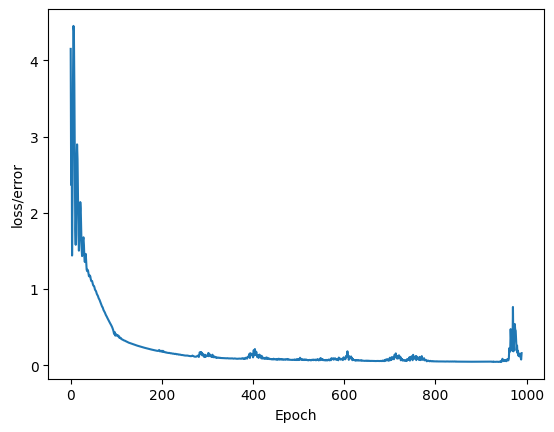

In [22]:
plt.plot(range(len(losses)), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [23]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy_score(y_test, torch.argmax(y_eval, dim=1))}')


Loss: 0.1664259284734726
Accuracy: 0.9221575664657305
